K-Nearest Neighbors -> Accuracy: 0.725
K-Nearest Neighbors -> F1 Score: 0.7027595476455322
K-Nearest Neighbors -> Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  1  4  0  0]
 [ 1  0  9  1  0]
 [ 0  0  3  3  0]
 [ 0  0  2  0  1]]
Decision Tree -> Accuracy: 1.0
Decision Tree -> F1 Score: 1.0
Decision Tree -> Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  3]]
Random Forest -> Accuracy: 1.0
Random Forest -> F1 Score: 1.0
Random Forest -> Confusion Matrix:
 [[15  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  3]]
             Algorithm  Accuracy  F1 Score
0  K-Nearest Neighbors     0.725   0.70276
1        Decision Tree     1.000   1.00000
2        Random Forest     1.000   1.00000


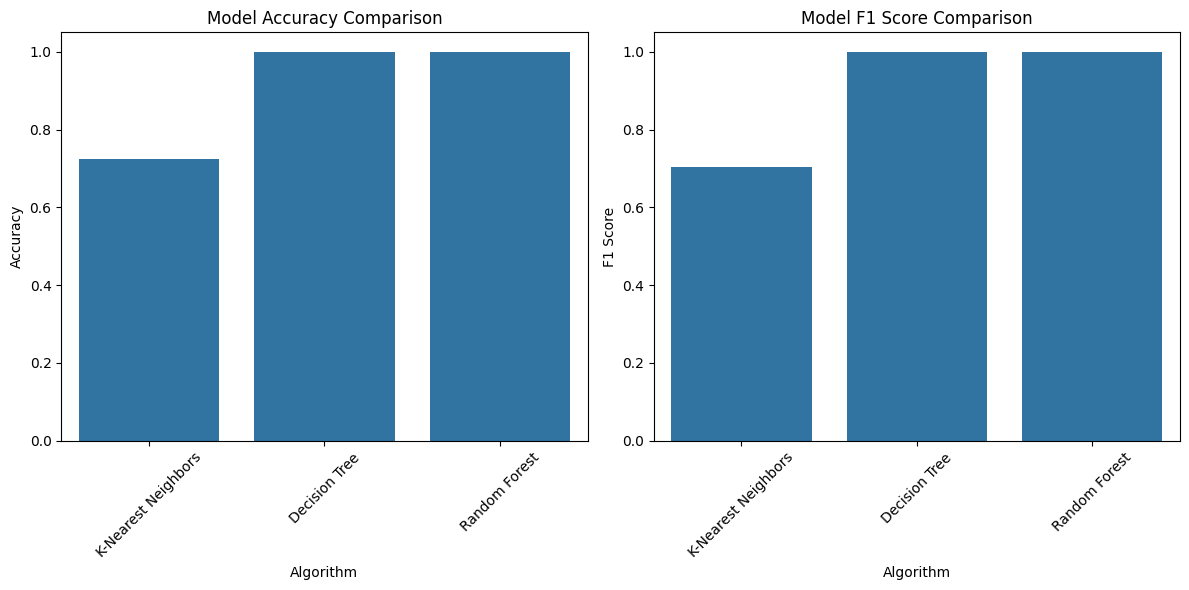

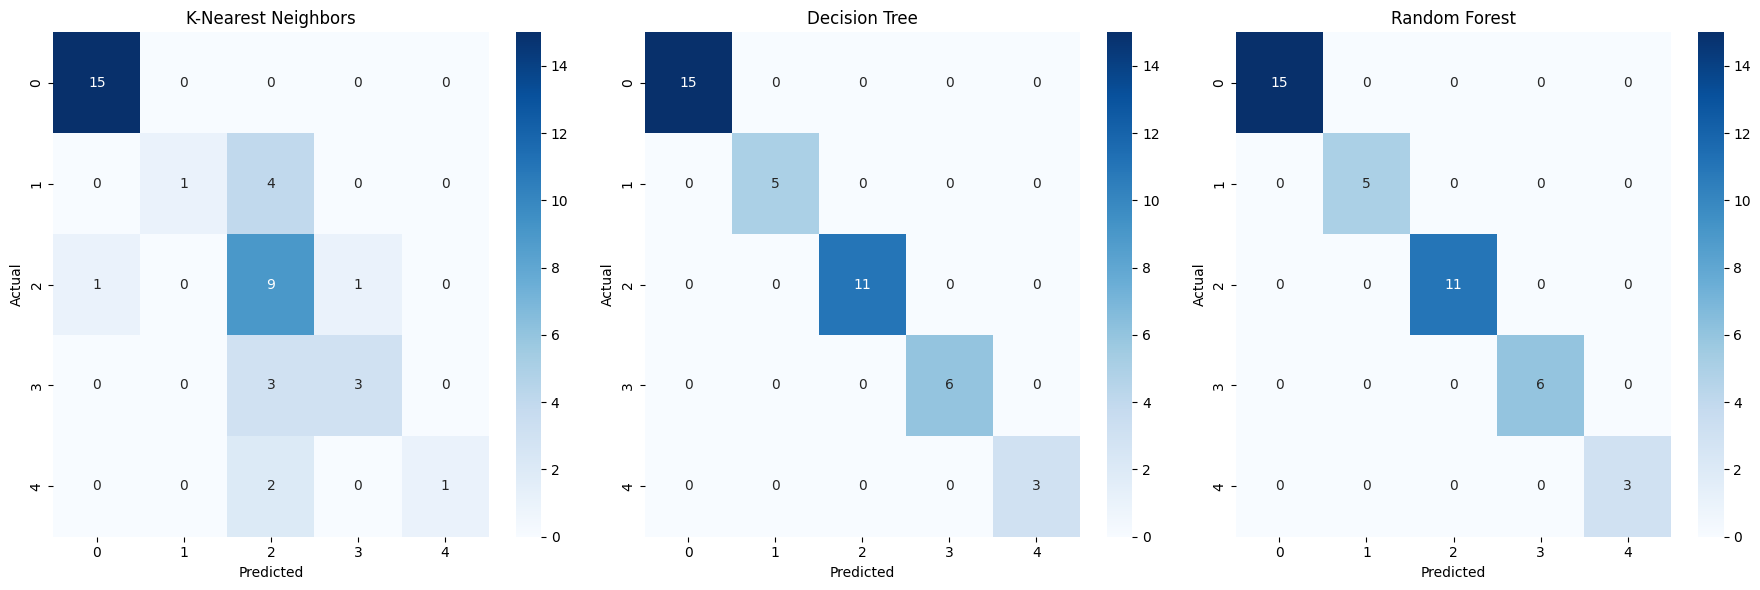

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/My Drive/drug200.csv')

# Backup the dataset
data_backup = data.copy()
data_backup.to_csv('/content/drive/My Drive/drug200_backup.csv', index=False)

# Convert categorical variables to numerical values
data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})
data['BP'] = data['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Cholesterol'] = data['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
data['Drug'] = data['Drug'].map({'DrugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4})

# Split the dataset
X = data.drop('Drug', axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print results
print("K-Nearest Neighbors -> Accuracy:", accuracy_knn)
print("K-Nearest Neighbors -> F1 Score:", f1_knn)
print("K-Nearest Neighbors -> Confusion Matrix:\n", conf_matrix_knn)

print("Decision Tree -> Accuracy:", accuracy_dt)
print("Decision Tree -> F1 Score:", f1_dt)
print("Decision Tree -> Confusion Matrix:\n", conf_matrix_dt)

print("Random Forest -> Accuracy:", accuracy_rf)
print("Random Forest -> F1 Score:", f1_rf)
print("Random Forest -> Confusion Matrix:\n", conf_matrix_rf)

# Performance table
performance_data = {
    'Algorithm': ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_rf],
    'F1 Score': [f1_knn, f1_dt, f1_rf]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

# Accuracy and F1 Score charts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Algorithm', y='Accuracy', data=performance_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Algorithm', y='F1 Score', data=performance_df)
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Confusion Matrix charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
conf_matrices = [conf_matrix_knn, conf_matrix_dt, conf_matrix_rf]
titles = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest']

for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Örnek: Bir CSV dosyasını yüklemek
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/drug.csv')

# Örnek: Bir dosyayı kaydetmek
data.to_csv('/content/drive/My Drive/drug.csv', index=False)
